In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import os

In [120]:
# Load dataset as a pandas dataframe and show first 5 rows
data_path= "heart.csv"
df = pd.read_csv(data_path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Task 1 - Exploratory data analysis

['N' 'Y']


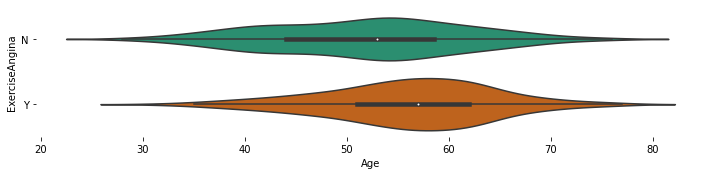

In [121]:
# ExerciseAngina vs Age

from matplotlib import pyplot as plt
import seaborn as sns
print(df['ExerciseAngina'].unique())
figsize = (12, 1.2 * len(df['ExerciseAngina'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(x=df['Age'], y=df['ExerciseAngina'], inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

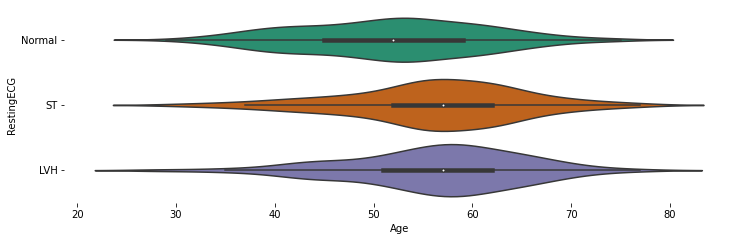

In [122]:
# RestingECG vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['RestingECG'].unique()))
plt.figure(figsize=figsize)
sns.violinplot( x=df['Age'], y=df['RestingECG'], inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

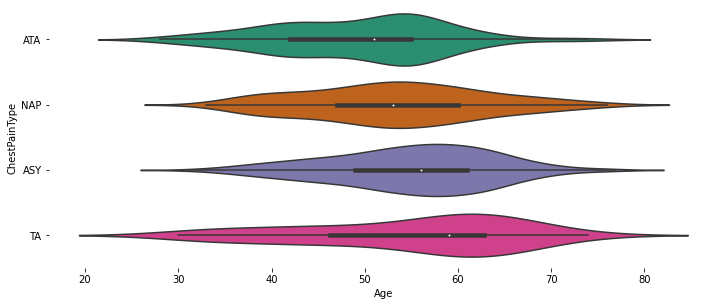

In [123]:
# ChestPainType vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['ChestPainType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(x=df['Age'], y=df['ChestPainType'], inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

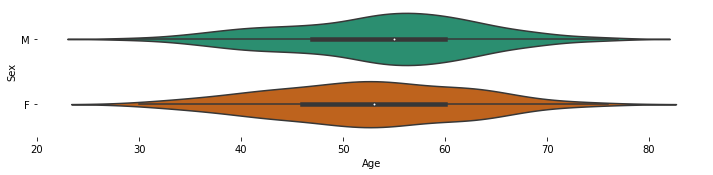

In [124]:
# Sex vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(x=df['Age'], y=df['Sex'], inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

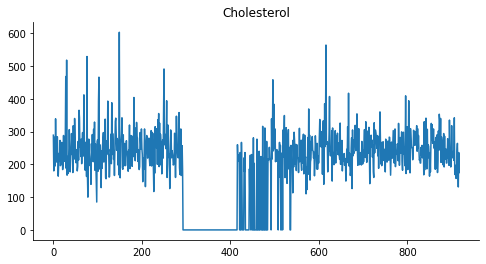

In [125]:
# Cholesterol

from matplotlib import pyplot as plt
df['Cholesterol'].plot(kind='line', figsize=(8, 4), title='Cholesterol')
plt.gca().spines[['top', 'right']].set_visible(False)

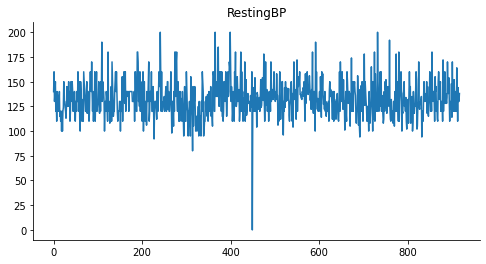

In [126]:
# RestingBP

from matplotlib import pyplot as plt
df['RestingBP'].plot(kind='line', figsize=(8, 4), title='RestingBP')
plt.gca().spines[['top', 'right']].set_visible(False)

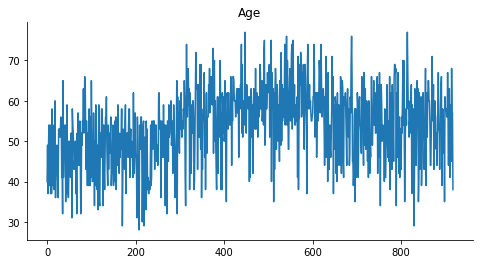

In [127]:
# Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

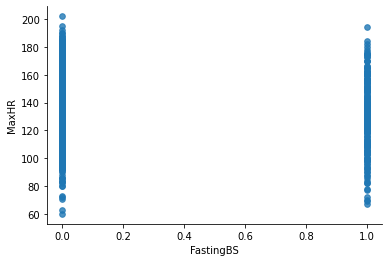

In [128]:
# FastingBS vs MaxHR

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='FastingBS', y='MaxHR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

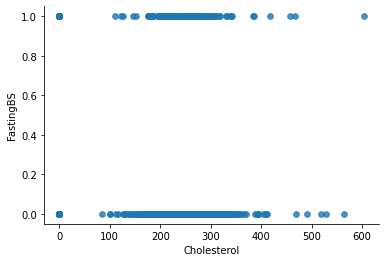

In [129]:
# title Cholesterol vs FastingBS

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Cholesterol', y='FastingBS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

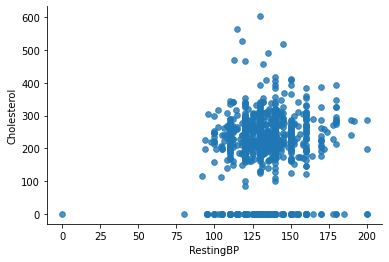

In [130]:
# title RestingBP vs Cholesterol

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='RestingBP', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

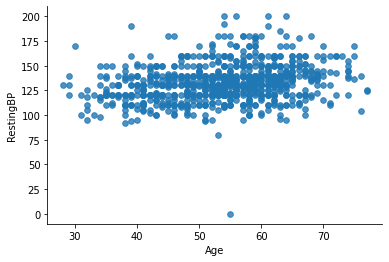

In [131]:
# title Age vs RestingBP

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='RestingBP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

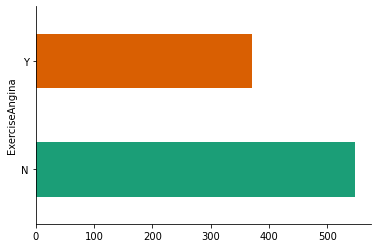

In [132]:
# title ExerciseAngina

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ExerciseAngina').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

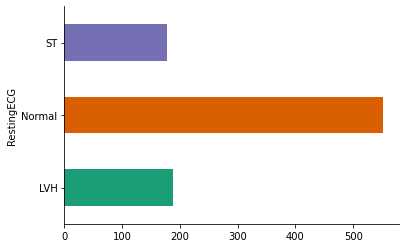

In [133]:
# title RestingECG

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('RestingECG').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

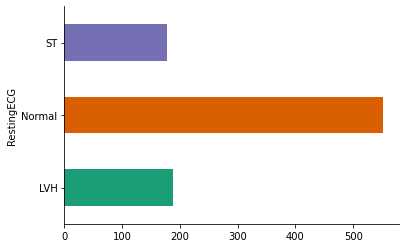

In [134]:
# title RestingECG

df.groupby('RestingECG').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

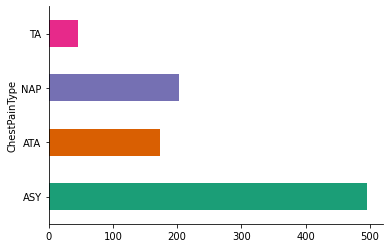

In [135]:
# title ChestPainType

df.groupby('ChestPainType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

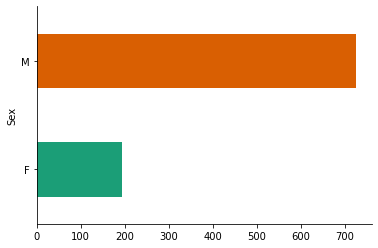

In [136]:
# title Sex

df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

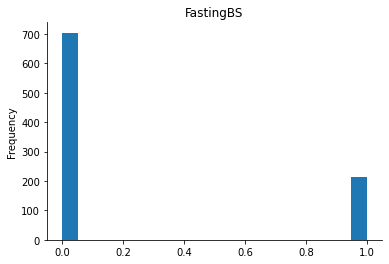

In [137]:
# title FastingBS

df['FastingBS'].plot(kind='hist', bins=20, title='FastingBS')
plt.gca().spines[['top', 'right',]].set_visible(False)

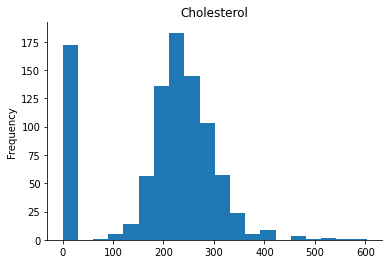

In [138]:
# title Cholesterol

df['Cholesterol'].plot(kind='hist', bins=20, title='Cholesterol')
plt.gca().spines[['top', 'right',]].set_visible(False)

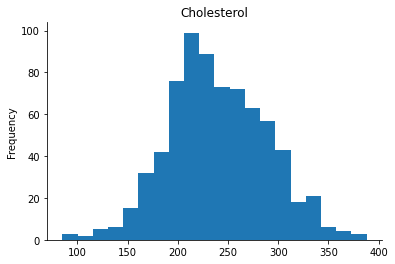

In [139]:
df = df[(df['Cholesterol'] <= 390) & (df['Cholesterol'] >= 20)]
df['Cholesterol'].plot(kind='hist', bins=20, title='Cholesterol')
plt.gca().spines[['top', 'right',]].set_visible(False)

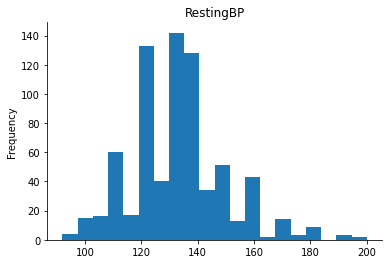

In [140]:
# title RestingBP

df['RestingBP'].plot(kind='hist', bins=20, title='RestingBP')
plt.gca().spines[['top', 'right',]].set_visible(False)

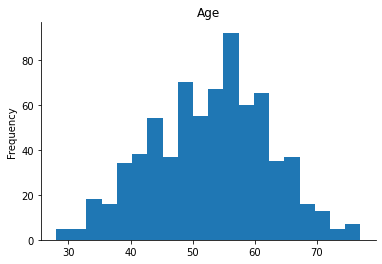

In [141]:
# title Age

df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

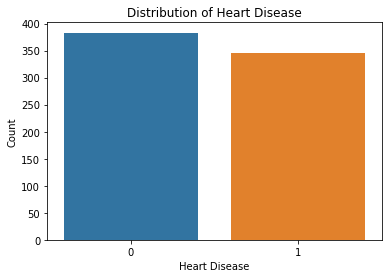

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of occurrences of 1 and 0 in the 'HeartDisease' column
sns.countplot(data=df, x='HeartDisease')

# Add title and labels
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Show plot
plt.show()


# Task 2 - Logistic Regression

In [142]:
# Check whether there are missing values in the dataset
missing_values = df.isnull().sum()
missing_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [143]:
# Get only numerical columns
numerical_columns = df.select_dtypes(include=['number'])
print(numerical_columns)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0     40        140          289          0    172      0.0             0
1     49        160          180          0    156      1.0             1
2     37        130          283          0     98      0.0             0
3     48        138          214          0    108      1.5             1
4     54        150          195          0    122      0.0             0
..   ...        ...          ...        ...    ...      ...           ...
913   45        110          264          0    132      1.2             1
914   68        144          193          1    141      3.4             1
915   57        130          131          0    115      1.2             1
916   57        130          236          0    174      0.0             1
917   38        138          175          0    173      0.0             0

[729 rows x 7 columns]


In [144]:
# Standardize numerical columns
numerical_array = numerical_columns.values
numerical_array

array([[ 40. , 140. , 289. , ..., 172. ,   0. ,   0. ],
       [ 49. , 160. , 180. , ..., 156. ,   1. ,   1. ],
       [ 37. , 130. , 283. , ...,  98. ,   0. ,   0. ],
       ...,
       [ 57. , 130. , 131. , ..., 115. ,   1.2,   1. ],
       [ 57. , 130. , 236. , ..., 174. ,   0. ,   1. ],
       [ 38. , 138. , 175. , ..., 173. ,   0. ,   0. ]])

In [145]:
trimmed_array = np.delete(numerical_array, [3, -1], axis=1)

In [146]:
trimmed_array

array([[ 40. , 140. , 289. , 172. ,   0. ],
       [ 49. , 160. , 180. , 156. ,   1. ],
       [ 37. , 130. , 283. ,  98. ,   0. ],
       ...,
       [ 57. , 130. , 131. , 115. ,   1.2],
       [ 57. , 130. , 236. , 174. ,   0. ],
       [ 38. , 138. , 175. , 173. ,   0. ]])

In [147]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_values = scaler.fit_transform(trimmed_array)
scaled_values

array([[-1.35642296,  0.40826944,  0.99847865,  1.29220374, -0.83765119],
       [-0.4090639 ,  1.56478167, -1.21142922,  0.63997887,  0.09449309],
       [-1.67220931, -0.16998667,  0.87683235, -1.72433626, -0.83765119],
       ...,
       [ 0.43303305, -0.16998667, -2.20487404, -1.03134734,  0.28092195],
       [ 0.43303305, -0.16998667, -0.0760637 ,  1.37373184, -0.83765119],
       [-1.56694719,  0.29261822, -1.31280114,  1.33296779, -0.83765119]])

In [148]:
df.iloc[:, 0] = scaled_values[:,0]
df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.356423,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,-0.409064,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,-1.672209,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,-0.514326,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,0.117247,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.830112,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,1.590916,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,0.433033,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,0.433033,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [149]:
df.iloc[:, 3] = scaled_values[:,1]
df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.356423,M,ATA,0.408269,289,0,Normal,172,N,0.0,Up,0
1,-0.409064,F,NAP,1.564782,180,0,Normal,156,N,1.0,Flat,1
2,-1.672209,M,ATA,-0.169987,283,0,ST,98,N,0.0,Up,0
3,-0.514326,F,ASY,0.292618,214,0,Normal,108,Y,1.5,Flat,1
4,0.117247,M,NAP,0.986526,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.830112,M,TA,-1.326499,264,0,Normal,132,N,1.2,Flat,1
914,1.590916,M,ASY,0.639572,193,1,Normal,141,N,3.4,Flat,1
915,0.433033,M,ASY,-0.169987,131,0,Normal,115,Y,1.2,Flat,1
916,0.433033,F,ATA,-0.169987,236,0,LVH,174,N,0.0,Flat,1


In [150]:
df.iloc[:, 4] = scaled_values[:,2]
df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.356423,M,ATA,0.408269,0.998479,0,Normal,172,N,0.0,Up,0
1,-0.409064,F,NAP,1.564782,-1.211429,0,Normal,156,N,1.0,Flat,1
2,-1.672209,M,ATA,-0.169987,0.876832,0,ST,98,N,0.0,Up,0
3,-0.514326,F,ASY,0.292618,-0.522100,0,Normal,108,Y,1.5,Flat,1
4,0.117247,M,NAP,0.986526,-0.907313,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.830112,M,TA,-1.326499,0.491619,0,Normal,132,N,1.2,Flat,1
914,1.590916,M,ASY,0.639572,-0.947862,1,Normal,141,N,3.4,Flat,1
915,0.433033,M,ASY,-0.169987,-2.204874,0,Normal,115,Y,1.2,Flat,1
916,0.433033,F,ATA,-0.169987,-0.076064,0,LVH,174,N,0.0,Flat,1


In [151]:
df.iloc[:, 7] = scaled_values[:,3]
df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.356423,M,ATA,0.408269,0.998479,0,Normal,1.292204,N,0.0,Up,0
1,-0.409064,F,NAP,1.564782,-1.211429,0,Normal,0.639979,N,1.0,Flat,1
2,-1.672209,M,ATA,-0.169987,0.876832,0,ST,-1.724336,N,0.0,Up,0
3,-0.514326,F,ASY,0.292618,-0.522100,0,Normal,-1.316696,Y,1.5,Flat,1
4,0.117247,M,NAP,0.986526,-0.907313,0,Normal,-0.745999,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.830112,M,TA,-1.326499,0.491619,0,Normal,-0.338358,N,1.2,Flat,1
914,1.590916,M,ASY,0.639572,-0.947862,1,Normal,0.028518,N,3.4,Flat,1
915,0.433033,M,ASY,-0.169987,-2.204874,0,Normal,-1.031347,Y,1.2,Flat,1
916,0.433033,F,ATA,-0.169987,-0.076064,0,LVH,1.373732,N,0.0,Flat,1


In [152]:
df.iloc[:, 9] = scaled_values[:,4]
df


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.356423,M,ATA,0.408269,0.998479,0,Normal,1.292204,N,-0.837651,Up,0
1,-0.409064,F,NAP,1.564782,-1.211429,0,Normal,0.639979,N,0.094493,Flat,1
2,-1.672209,M,ATA,-0.169987,0.876832,0,ST,-1.724336,N,-0.837651,Up,0
3,-0.514326,F,ASY,0.292618,-0.522100,0,Normal,-1.316696,Y,0.560565,Flat,1
4,0.117247,M,NAP,0.986526,-0.907313,0,Normal,-0.745999,N,-0.837651,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.830112,M,TA,-1.326499,0.491619,0,Normal,-0.338358,N,0.280922,Flat,1
914,1.590916,M,ASY,0.639572,-0.947862,1,Normal,0.028518,N,2.331639,Flat,1
915,0.433033,M,ASY,-0.169987,-2.204874,0,Normal,-1.031347,Y,0.280922,Flat,1
916,0.433033,F,ATA,-0.169987,-0.076064,0,LVH,1.373732,N,-0.837651,Flat,1


In [153]:
# Splitting the data into features (X) and target variable (y)
y = df['HeartDisease']
X = df.drop(columns=['HeartDisease'])

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Label Encoding for ordinal categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    if len(X[col].unique()) > 1:  # Apply label encoding only for columns with more than 2 categories
        X[col] = label_encoder.fit_transform(X[col])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting logistic regression model
logistic_regression = LogisticRegression(penalty='l1', solver='liblinear')
logistic_regression.fit(X_train, y_train)

# Predicting on the test set
y_pred = logistic_regression.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Accuracy: 0.8493150684931506
F1-score: 0.8493150684931507


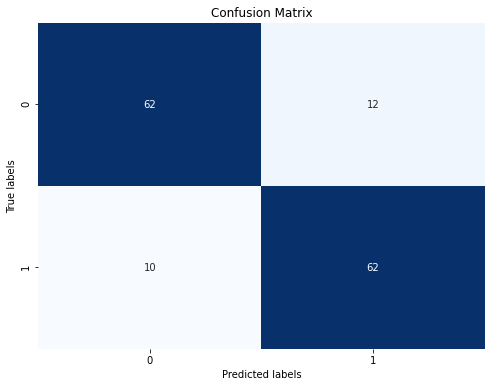

In [154]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

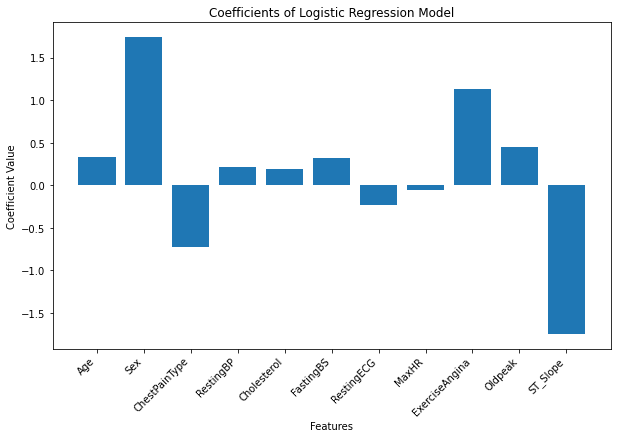

In [155]:
coefficients = logistic_regression.coef_
feature_names = X_train.columns if hasattr(X_train, 'columns') else range(len(coefficients[0]))

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients[0])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

# Task 3 - MLP and Shapely Values

In [156]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Splitting the data into features (X) and target variable (y)
y = df['HeartDisease']
X = df.drop(columns=['HeartDisease'])

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Label Encoding for ordinal categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    if len(X[col].unique()) > 1:  # Apply label encoding only for columns with more than 2 categories
        X[col] = label_encoder.fit_transform(X[col])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting MLPClassifier model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001,
                               batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                               max_iter=200, shuffle=True, random_state=None, tol=0.0001,
                               early_stopping=False, validation_fraction=0.1, n_iter_no_change=10,
                               verbose=False, momentum=0.9, nesterovs_momentum=True,
                               beta_1=0.9, beta_2=0.999, epsilon=1e-08
                               )
mlp_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = mlp_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


Accuracy: 0.8287671232876712
F1-score: 0.8275862068965517


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [157]:
import shap

# Wrap the MLPClassifier in a function for compatibility with SHAP
def mlp_predict(data):
    return mlp_classifier.predict_proba(data)

# Initialize the SHAP explainer with the wrapped MLP classifier
explainer = shap.Explainer(mlp_predict, X_train)

# Calculate SHAP values for the entire test set
shap_values = explainer.shap_values(X_test)

# Generate summary plots for each class
for class_idx in range(shap_values.shape[2]):
    shap.summary_plot(shap_values[:, :, class_idx], X_test, feature_names=X_test.columns)


AttributeError: 'Explanation' object has no attribute '_old_format'

# Task 4 - Neural Additive Models

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Define a simple neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

# Load your dataset
y = df['HeartDisease']
X = df.drop(columns=['HeartDisease'])

# Convert categorical columns to numeric using LabelEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to numpy arrays and then PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test.values)

# Define the neural network
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1  # For binary classification
model = NeuralNetwork(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the neural network
num_epochs = 200
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Convert model to evaluation mode
model.eval()

# Use SHAP to explain the predictions of the neural network
explainer = shap.DeepExplainer(model, X_train_tensor)
shap_values = explainer.shap_values(X_test_tensor)

# Predicting on the test set
y_pred = model(X_test_tensor).detach().numpy().round()

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Epoch [10/200], Loss: 0.6375
Epoch [20/200], Loss: 0.5944
Epoch [30/200], Loss: 0.5558
Epoch [40/200], Loss: 0.5205
Epoch [50/200], Loss: 0.4888
Epoch [60/200], Loss: 0.4617
Epoch [70/200], Loss: 0.4390
Epoch [80/200], Loss: 0.4205
Epoch [90/200], Loss: 0.4053
Epoch [100/200], Loss: 0.3928
Epoch [110/200], Loss: 0.3823
Epoch [120/200], Loss: 0.3734
Epoch [130/200], Loss: 0.3659
Epoch [140/200], Loss: 0.3594
Epoch [150/200], Loss: 0.3537
Epoch [160/200], Loss: 0.3487
Epoch [170/200], Loss: 0.3443
Epoch [180/200], Loss: 0.3404
Epoch [190/200], Loss: 0.3369
Epoch [200/200], Loss: 0.3337
Accuracy: 0.8369565217391305
F1-score: 0.8514851485148515


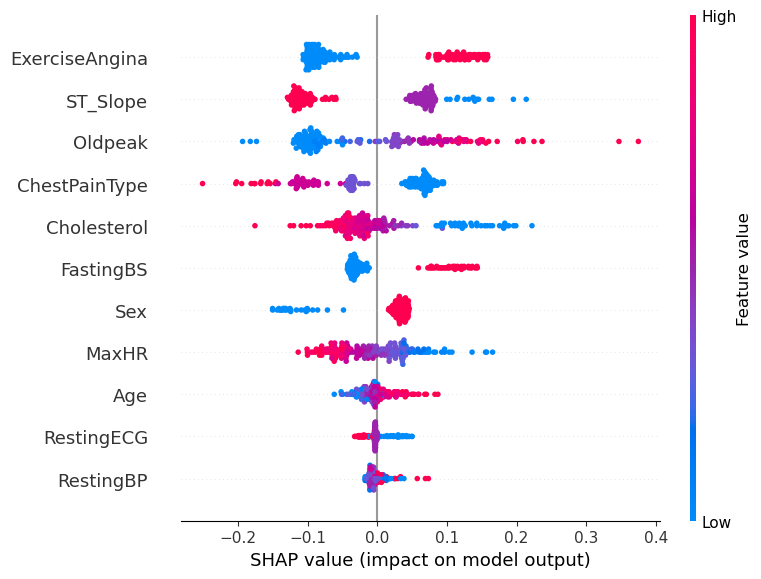

In [ ]:
# Generate summary plots for each class
for class_idx in range(shap_values.shape[2]):
    shap.summary_plot(shap_values[:, :, class_idx], X_test, feature_names=X_test.columns)